In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [111]:
#https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import math

from matplotlib import pyplot as plt
from sklearn import preprocessing

In [12]:
df = pd.read_csv('data/ambient_temperature_system_failure.csv')
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


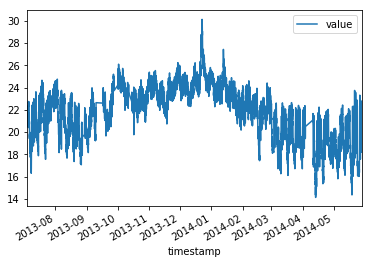

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['value'] = (df['value'] - 32) * 5 / 9
df.plot(x='timestamp', y='value')

In [14]:
df.shape

(7267, 2)

In [15]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & 
                  (df['hours'] <= 22)).astype(int)
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['weekday'] = (df['dayofweek'] < 5).astype(int)

In [16]:
df

,timestamp,value,hours,daylight,dayofweek,weekday
0,2013-07-04 00:00:00,21.044908,0,0,3,1
1,2013-07-04 01:00:00,21.789015,1,0,3,1
2,2013-07-04 02:00:00,21.598781,2,0,3,1
3,2013-07-04 03:00:00,20.533000,3,0,3,1
4,2013-07-04 04:00:00,20.713084,4,0,3,1
...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1
7263,2014-05-28 12:00:00,22.318309,12,1,2,1
7264,2014-05-28 13:00:00,22.248092,13,1,2,1
7265,2014-05-28 14:00:00,22.125126,14,1,2,1


In [17]:
data_n = df[['value', 'hours', 'daylight', 
             'dayofweek', 'weekday']]
print ("type(data_n) = ", type(data_n))
min_max_scaler = preprocessing.StandardScaler()
scaled = min_max_scaler.fit_transform(data_n)
data_n = pd.DataFrame(scaled)

type(data_n) =  <class 'pandas.core.frame.DataFrame'>


/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
data_n.shape

(7267, 5)

In [19]:
x = data_n[:-1].as_matrix()
print("x.shape=", x.shape, ", type(x)=", type(x))
len(x)

x.shape= (7266, 5) , type(x)= <class 'numpy.ndarray'>


/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


7266

In [20]:
x = data_n[:-1].as_matrix()
seqlen = 50
x = [x[i:i + seqlen] for i in range(len(x) - seqlen+1)]
print("x.len=", len(x), ", type(x)=", type(x))
x = np.asarray(x)
print("x.shape=", x.shape, ", type(x)=", type(x))
# x.shape = (7217, 50, 5)

x.len= 7217 , type(x)= <class 'list'>
x.shape= (7217, 50, 5) , type(x)= <class 'numpy.ndarray'>


/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [21]:
y = data_n[1:][0].as_matrix() #y.shape = (7266,)
print ("y.shape=", y.shape)
y = y[-x.shape[0]:]           #y.shape = (7217,)
print ("y.shape=", y.shape)
y = np.reshape(y, (y.shape[0], 1))  #y.shape = (7217,1)
print ("y.shape=", y.shape)


y.shape= (7266,)
y.shape= (7217,)
y.shape= (7217, 1)


/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [22]:
n_test, n_valid = 1000, 500

x_train = x[:-(n_test + n_valid)]
x_valid = x[-(n_test + n_valid):-n_test]
x_test = x[-n_test:]

y_train = y[:-(n_test + n_valid)]
y_valid = y[-(n_test + n_valid):-n_test]
y_test = y[-n_test:]

In [23]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(5717, 50, 5) (5717, 1)
(500, 50, 5) (500, 1)
(1000, 50, 5) (1000, 1)


In [24]:
df

,timestamp,value,hours,daylight,dayofweek,weekday
0,2013-07-04 00:00:00,21.044908,0,0,3,1
1,2013-07-04 01:00:00,21.789015,1,0,3,1
2,2013-07-04 02:00:00,21.598781,2,0,3,1
3,2013-07-04 03:00:00,20.533000,3,0,3,1
4,2013-07-04 04:00:00,20.713084,4,0,3,1
...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1
7263,2014-05-28 12:00:00,22.318309,12,1,2,1
7264,2014-05-28 13:00:00,22.248092,13,1,2,1
7265,2014-05-28 14:00:00,22.125126,14,1,2,1


In [25]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [41]:
data = df[['value', 'hours', 'daylight', 'dayofweek', 'weekday']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


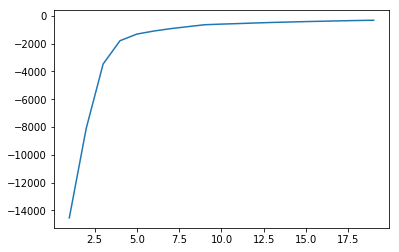

In [42]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [44]:
df['cluster'] = kmeans[14].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

8     649
12    605
6     601
3     596
11    570
10    558
2     510
14    486
9     472
4     445
1     432
13    351
0     347
7     336
5     309
Name: cluster, dtype: int64

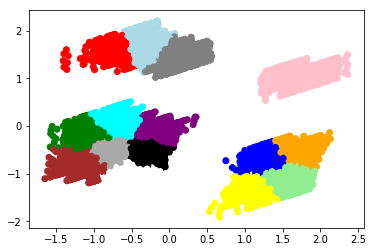

In [45]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [48]:
def getDistanceByPoint(data, model): 
    distance = pd.Series() 
    for i in range(0,len(data)): 
        Xa = np.array(data.loc[i]) 
        Xb = model.cluster_centers_[model.labels_[i]-1] 
        distance.set_value(i, np.linalg.norm(Xa-Xb)) 
    return distance

In [50]:
outliers_fraction = 0.01

In [51]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


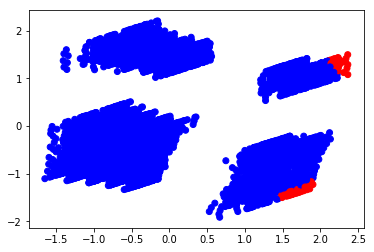

In [52]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

In [54]:
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

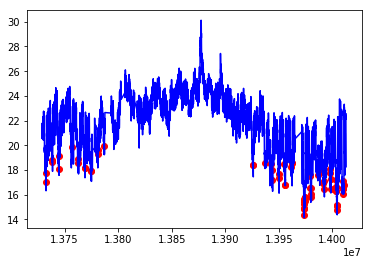

In [55]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly21'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

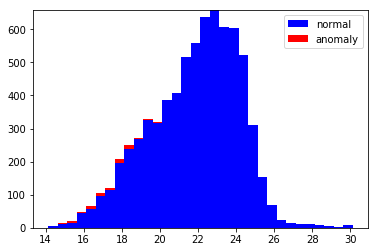

In [56]:
a = df.loc[df['anomaly21'] == 0, 'value']
b = df.loc[df['anomaly21'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

In [100]:
# definition of the different state
x1 = (df['value'] <=18).astype(int)
x2= ((df['value'] > 18) & (df['value']<=21)).astype(int)
x3 = ((df['value'] > 21) & (df['value']<=24)).astype(int)
x4 = ((df['value'] > 24) & (df['value']<=27)).astype(int)
x5 = (df['value'] >27).astype(int)
df_mm = x1 + 2*x2 + 3*x3 + 4*x4 + 5*x5

# getting the anomaly labels for our dataset (evaluating sequence of 5 values and anomaly = less than 20% probable)
# I USE pyemma NOT AVAILABLE IN KAGGLE KERNEL
#df_anomaly = markovAnomaly(df_mm, 5, 0.20)
#df_anomaly = pd.Series(df_anomaly)
#print(df_anomaly.value_counts())

In [102]:
data = df[['value', 'hours', 'daylight', 'dayofweek', 'weekday']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df['anomaly25'] = pd.Series(model.predict(data))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0    7194
1      73
Name: anomaly25, dtype: int64


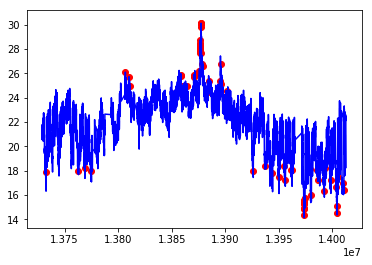

In [103]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly25'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

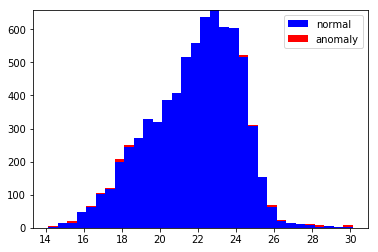

In [105]:
# visualisation of anomaly with temperature repartition (viz 2)
a = df.loc[df['anomaly25'] == 0, 'value']
b = df.loc[df['anomaly25'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [106]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
# train one class SVM 
model =  OneClassSVM(nu=0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
data = pd.DataFrame(np_scaled)
model.fit(data)
# add the data to the main  
df['anomaly26'] = pd.Series(model.predict(data))
df['anomaly26'] = df['anomaly26'].map( {1: 0, -1: 1} )
print(df['anomaly26'].value_counts())

0    7198
1      69
Name: anomaly26, dtype: int64


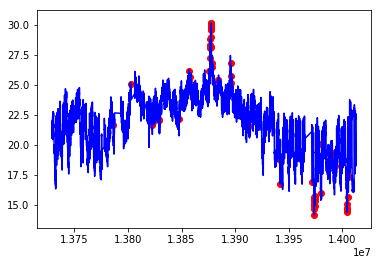

In [107]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly26'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

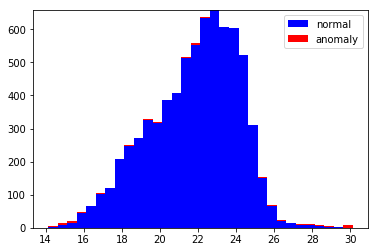

In [108]:
a = df.loc[df['anomaly26'] == 0, 'value']
b = df.loc[df['anomaly26'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

## LSTM을 이용한 Anomaly Detection

In [58]:
data_n = df[['value', 'hours', 'daylight', 'dayofweek', 'weekday']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_n)
data_n = pd.DataFrame(np_scaled)

# important parameters and train/test size
prediction_time = 1 
testdatasize = 1000
unroll_length = 50
testdatacut = testdatasize + unroll_length  + 1

#train data
x_train = data_n[0:-prediction_time-testdatacut].as_matrix()
y_train = data_n[prediction_time:-testdatacut  ][0].as_matrix()

# test data
x_test = data_n[0-testdatacut:-prediction_time].as_matrix()
y_test = data_n[prediction_time-testdatacut:  ][0].as_matrix()

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/anaconda/lib/python3.7/site-packages/ipykernel_launch

In [26]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from keras.models import model_from_json
import sys

Using TensorFlow backend.


In [97]:
model = Sequential()

model.add(LSTM(
    input_dim=x_train.shape[-1],
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 5), units=50)`
  


compilation time : 0.018977642059326172


In [98]:
model.fit(
    x_train,
    y_train,
    batch_size=3028,
    nb_epoch=30,
    validation_split=0.1)

/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5145 samples, validate on 572 samples
Epoch 1/30
5145/5145 [==============================] - 2s 334us/step - loss: 0.7578 - val_loss: 0.5924
Epoch 2/30
5145/5145 [==============================] - 0s 62us/step - loss: 0.2221 - val_loss: 0.3684
Epoch 3/30
5145/5145 [==============================] - 0s 61us/step - loss: 0.1932 - val_loss: 0.2161
Epoch 4/30
5145/5145 [==============================] - 0s 66us/step - loss: 0.1331 - val_loss: 0.1953
Epoch 5/30
5145/5145 [==============================] - 0s 63us/step - loss: 0.1195 - val_loss: 0.1563
Epoch 6/30
5145/5145 [==============================] - 0s 62us/step - loss: 0.0888 - val_loss: 0.1429
Epoch 7/30
5145/5145 [==============================] - 0s 55us/step - loss: 0.0880 - val_loss: 0.1378
Epoch 8/30
5145/5145 [==============================] - 0s 55us/step - loss: 0.0898 - val_loss: 0.1338
Epoch 9/30
5145/5145 [==============================] - 0s 62us/step - loss: 0.0911 - val_loss: 0.1262
Epoch 10/30
5145/5145 [==

In [75]:
loaded_model = model
diff=[]
ratio=[]
p = loaded_model.predict(x_test)
# predictions = lstm.predict_sequences_multiple(loaded_model, x_test, 50, 50)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

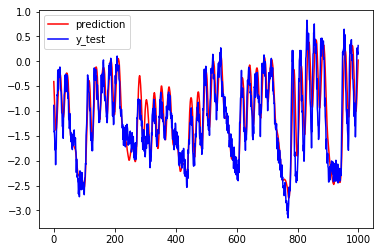

In [76]:
# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots()
axs.plot(p,color='red', label='prediction')
axs.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

In [77]:
outliers_fraction = 0.01
import numpy as np 
import pandas as pd
import pandas as pd 

In [83]:
testdatasize = 1000

In [85]:
#diff = pd.Series(diff)
diff = pd.DataFrame(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.stack().nlargest(number_of_outliers).min()
# data with anomaly label (test data part)
test = (diff >= threshold).astype(int)
# the training data part where we didn't predict anything (overfitting possible): no anomaly
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
# add the data to the main
df['anomaly27'] = complement.append(test, ignore_index='True')
print(df['anomaly27'].value_counts())

0    7257
1      10
Name: anomaly27, dtype: int64


In [87]:
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

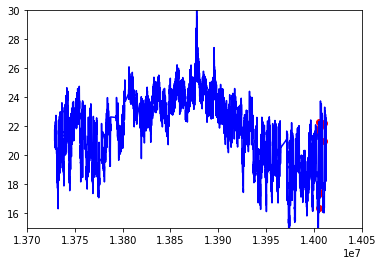

In [88]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly27'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.axis([1.370*1e7, 1.405*1e7, 15,30])
plt.show()

No handles with labels found to put in legend.


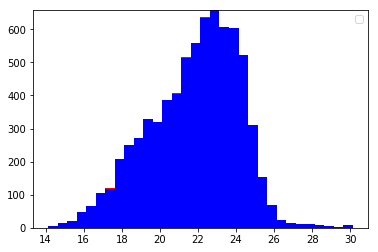

In [89]:
a = df.loc[df['anomaly27'] == 0, 'value']
b = df.loc[df['anomaly27'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.legend()
plt.show()